#  4.9 Intro to Data Visualiazation in Python Part 2

##  This script includes the following points:

####  Q1. Import libraries and most recent data set from Part 1
####  Q3. Create a histogram of the "order_hour_of_day" column to provide descriptive findings about sales.
####  Q4. Create a bar chart from the "loyalty_flag" column.
####  Q5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.
####  Q6. Create a line chart exploring the connections between age and number of dependents.
####  Q7. Create a scatterplot using the sns.scatterplot( ) function to show connection between age and income.

# Q1. Import libraries and most recent data set from Part 1

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path
path = r'/Users/andrewruhnow/Documents/12-2023 Instacart Basket Analysis'

In [4]:
path

'/Users/andrewruhnow/Documents/12-2023 Instacart Basket Analysis'

In [5]:
df_all_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [6]:
df_all_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,First Name,Last Name,Gender,State,Age,date_joined,dependants,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both


# Q3. Create a histogram of the "order_hour_of_day" column to provide descriptive findings about sales.

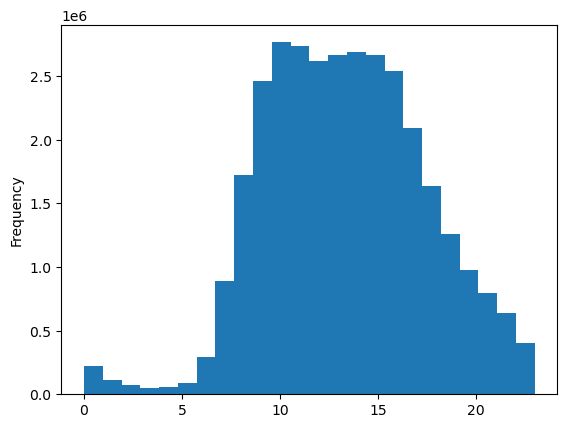

In [8]:
# Create Histogram by "order_hour_of_day"
hist = df_all_merged['order_hour_of_day'].plot.hist(bins = 24)

Histogram shows busiest hour for orders is 10am.  Busiest hours are 10am-49.  Slowest hours are 12a-5a.  

In [9]:
# Saving histogram to visualizations folder
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day'))

# Q4. Create a bar chart from the "loyalty_flag" column.

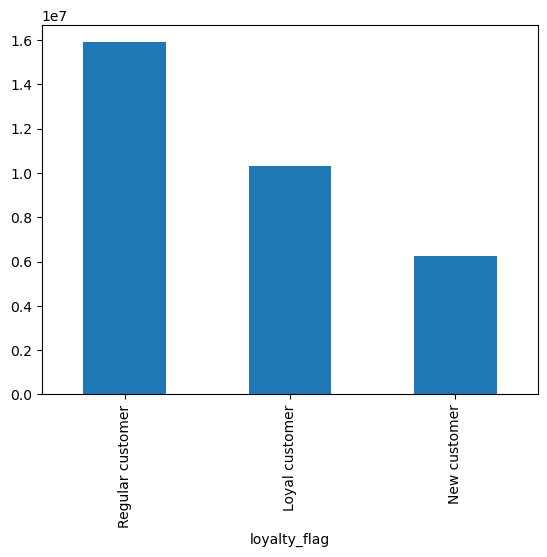

In [10]:
# Create bar chart by "orders_day_of_week"
bar = df_all_merged['loyalty_flag'].value_counts().plot.bar()

In [11]:
# saving bar chart to visualizations folder
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Bar_cust_loyalty'))

# Q5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [13]:
# Sampling data 70/30
np.random.seed(4)
dev = np.random.rand(len(df_all_merged)) <= 0.7

In [14]:
dev

array([False,  True, False, ..., False,  True,  True])

In [15]:
np.random.rand(10)

array([0.16891835, 0.04368635, 0.41602642, 0.88973306, 0.66299301,
       0.78345326, 0.02169353, 0.79078115, 0.45980038, 0.17173956])

In [16]:
# Splitting dataframe into two samples 'big (70%)' and 'small (30%)'
big = df_all_merged[dev]
small = df_all_merged[~dev]

In [18]:
len(df_all_merged)

32434212

In [19]:
len(big) + len(small)

32434212

In [20]:
# Running samples of only necessary columns "prices" and "order_hour_of_day"
df_2 = small[['order_hour_of_day', 'prices']]

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


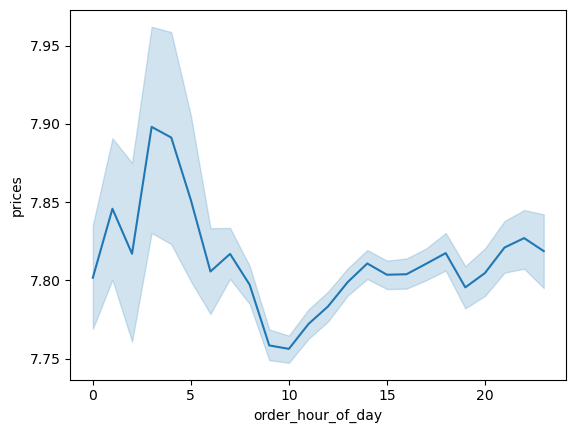

In [21]:
# Create line chart for "order_hour_of_day" and "prices"
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [22]:
# saving line chart to visualizations folder
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_hour_of_day'))

# Q6. Create a line chart exploring the connections between age and number of dependents.

In [28]:
# Fixing spelling of "dependants" column to "dependents"
df_all_merged.rename(columns = {'dependants' : 'dependents'}, inplace = True)

In [29]:
df_all_merged.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,First Name,Last Name,Gender,State,Age,date_joined,dependents,family_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both


In [31]:
# Create dataframe from small sample with Age and dependents only
df_3 = small[['Age', 'dependants']]

/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/andrewruhnow/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


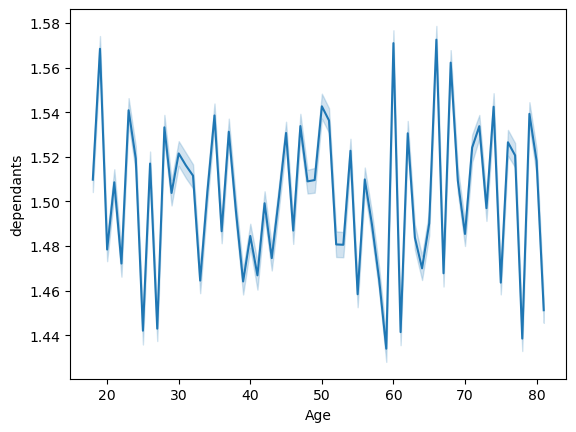

In [32]:
# Create line chart for age and dependents only
line2 = sns.lineplot(data = df_3, x = 'Age', y = 'dependants')

The line chart doesn't show a connection between age and dependents.  It does show an increase of teenage dependents and for people over 60 years of age. 

In [33]:
# saving line chart to visualizations folder
line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependents'))

# Q7. Create a scatterplot using the sns.scatterplot( ) function to show connection between age and income.

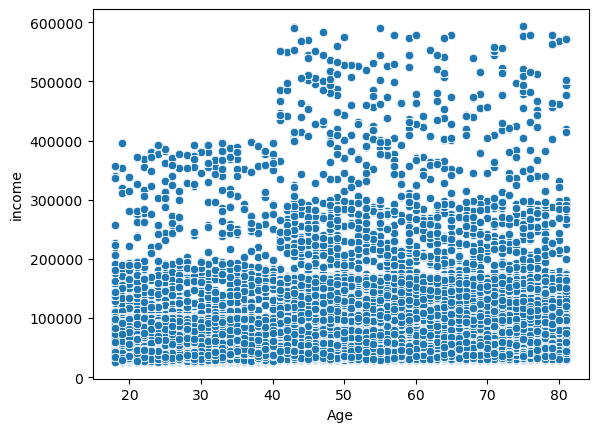

In [34]:
scatter = sns.scatterplot(x = 'Age', y = 'income', data = df_all_merged)

The scatterplot shows a higher income for customers over 40.  Majority of customers are in the 100k - 300k income range.

In [35]:
# saving scatterplot chart to visualizations folder

In [36]:
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter, age_income'))